# Dataset Overview of Bank Marketing:

The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

**Source**: http://archive.ics.uci.edu/ml/datasets/Bank+Marketing#

Data Set Information:
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

## The question:
### Has the client subscribed a term deposit? 'yes' or 'no


Dataset Variables Summary:
Bank client data:

- Age (numeric)
- Job : type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')
- Marital : marital status (categorical: 'divorced', 'married', 'single', 'unknown' ; note: 'divorced' means divorced or widowed)
- Education (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')
- Default: has credit in default? (categorical: 'no', 'yes', 'unknown')
- Housing: has housing loan? (categorical: 'no', 'yes', 'unknown')
- Loan: has personal loan? (categorical: 'no', 'yes', 'unknown')
Related with the last contact of the current campaign:
- Contact: contact communication type (categorical:
'cellular','telephone')
- Month: last contact month of year (categorical: 'jan', 'feb', 'mar',
…, 'nov', 'dec')
- Dayofweek: last contact day of the week (categorical:
'mon','tue','wed','thu','fri')
- Duration: last contact duration, in seconds (numeric). Important
note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call
is performed. Also, after the end of the call y is obviously known.
Thus, this input should only be included for benchmark purposes and
should be discarded if the intention is to have a realistic
predictive model.
Other attributes:

- Campaign: number of contacts performed during this campaign and for
this client (numeric, includes last contact)
- Pdays: number of days that passed by after the client was last
contacted from a previous campaign (numeric; 999 means client was not
previously contacted)
- Previous: number of contacts performed before this campaign and for
this client (numeric)
- Poutcome: outcome of the previous marketing campaign (categorical:
'failure','nonexistent','success')
Social and economic context attributes

- Emp.var.rate: employment variation rate - quarterly indicator
(numeric)
- Cons.price.idx: consumer price index - monthly indicator (numeric)
- Cons.conf.idx: consumer confidence index - monthly indicator
(numeric)
- Euribor3m: euribor 3 month rate - daily indicator (numeric)
- Nr.employed: number of employees - quarterly indicator (numeric)
- Output variable (desired target):
y - has the client subscribed a term deposit? (binary: 'yes', 'no')
Analysis Steps:

Atribute information Analysis.
Machine Learning (Logistic Regression, KNN, SVM, Decision Tree, 
Random Forest, Naive Bayes)



In [38]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

# Loading Libraries

In [1]:
# install
# pip install pandas-profiling[notebook]

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling

In [158]:
#ML Model Selection
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# ML Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# ML Preprocessing
from sklearn.preprocessing import StandardScaler

# Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve

In [33]:
bank = pd.read_csv("bank-additional-full.csv", sep = ";")

In [34]:
bank

age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact month day_of_week  ...  campaign  pdays  previous  \
0      telephone   may         mon  ...         1    999         0   
1      telephone   may         mon  ...         1    999         0   
2      telephone   may         mon  ...         1    999         0   
3      telephone   may         mon  ...         1    999         0   
4      telephone   may         mon  ...         1    999         0   
...          ...   ...         ...  ...       ...    ...       ...   
41183   cellular   nov         fri  ...         1    999         0   
41184   cellular   nov         fri  ...         1    999         0   
41185   cellular   nov         fri  ...         2    999         0   
41186   cellular   nov         fri  ...         1    999         0   
41187   cellular   nov         fri  ...         3    999         1   

          poutcome emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0      nonexistent          1.1          93.994          -36.4      4.857   
1      nonexistent          1.1          93.994          -36.4      4.857   
2      nonexistent          1.1          93.994          -36.4      4.857   
3      nonexistent          1.1          93.994          -36.4      4.857   
4      nonexistent          1.1          93.994          -36.4      4.857   
...            ...          ...             ...            ...        ...   
41183  nonexistent         -1.1          94.767          -50.8      1.028   
41184  nonexistent         -1.1          94.767          -50.8      1.028   
41185  nonexistent         -1.1          94.767          -50.8      1.028   
41186  nonexistent         -1.1          94.767          -50.8      1.028   
41187      failure         -1.1          94.767          -50.8      1.028   

       nr.employed    y  
0           5191.0   no  
1           5191.0   no  
2           5191.0   no  
3           5191.0   no  
4           5191.0   no  
...            ...  ...  
41183       4963.6  yes  
41184       4963.6   no  
41185       4963.6   no  
41186       4963.6  yes  
41187       4963.6   no  

[41188 rows x 21 columns]

In [5]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [71]:
# all categorical vars
cat = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week", "poutcome", "y" ]

# EDA and Visualization

ploting variables and see their occurrences in the dataset. I will use pandas_profiling to build visualization for numeric and categoricals.

In [6]:
pandas_profiling.ProfileReport(bank)

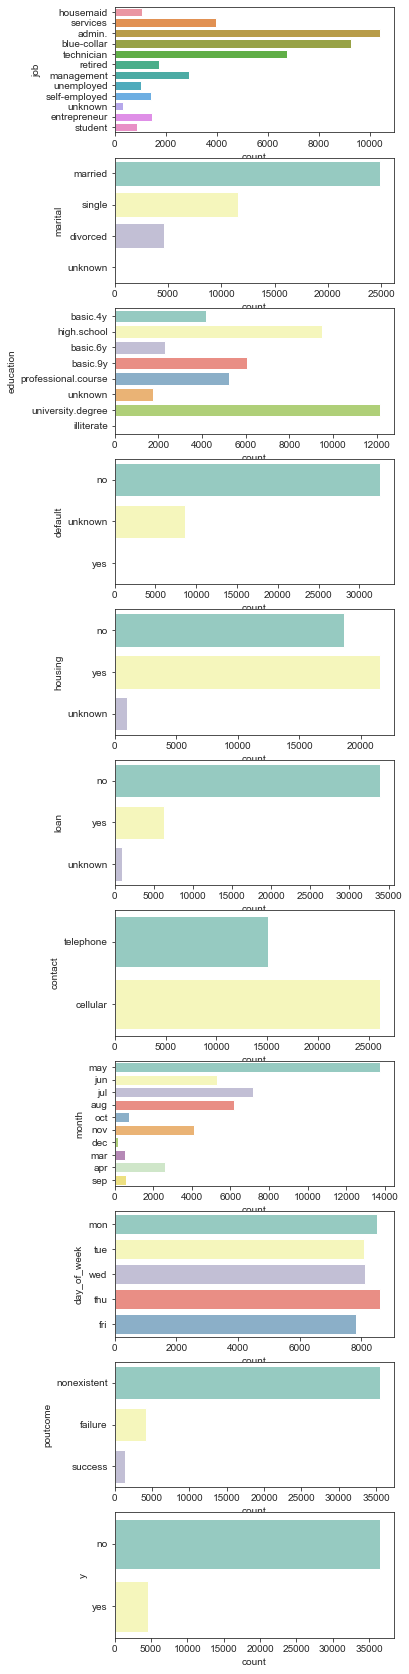

In [109]:
fig, ax = plt.subplots(len(cat), 1, figsize=(5, 30))
for variable, subplot in zip(cat, ax.flatten()):
    sns.set_style("ticks")
    sns.countplot(y=bank[variable], ax=subplot, label='small')
    for label in subplot.get_xticklabels():
        label.set_rotation(0)
        plt.rcParams["font.family"] = "arial"

### Lets look how many  the client subscribed a term deposit? ('yes', 'no') 

### we have 88% of client that did not subscribe to the term deposit. The data has many imbalanced variables including y variable

In [116]:
bank.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

### We do not have any missing values. and we see sme correlation of different correlation

In [117]:
bank["pdays"].value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
19         3
22         3
21         2
26         1
20         1
25         1
27         1
Name: pdays, dtype: int64

In [118]:
bank.describe().T

count         mean         std       min       25%  \
age             41188.0    40.024060   10.421250    17.000    32.000   
duration        41188.0   258.285010  259.279249     0.000   102.000   
campaign        41188.0     2.567593    2.770014     1.000     1.000   
pdays           41188.0   962.475454  186.910907     0.000   999.000   
previous        41188.0     0.172963    0.494901     0.000     0.000   
emp.var.rate    41188.0     0.081886    1.570960    -3.400    -1.800   
cons.price.idx  41188.0    93.575664    0.578840    92.201    93.075   
cons.conf.idx   41188.0   -40.502600    4.628198   -50.800   -42.700   
euribor3m       41188.0     3.621291    1.734447     0.634     1.344   
nr.employed     41188.0  5167.035911   72.251528  4963.600  5099.100   

                     50%       75%       max  
age               38.000    47.000    98.000  
duration         180.000   319.000  4918.000  
campaign           2.000     3.000    56.000  
pdays            999.000   999.000   999.000  
previous           0.000     0.000     7.000  
emp.var.rate       1.100     1.400     1.400  
cons.price.idx    93.749    93.994    94.767  
cons.conf.idx    -41.800   -36.400   -26.900  
euribor3m          4.857     4.961     5.045  
nr.employed     5191.000  5228.100  5228.100

### as we notice pdays is very unbalanced with a 39673 value has 999. that means the client was not contacted 

Lets see how the distribution of of the clients

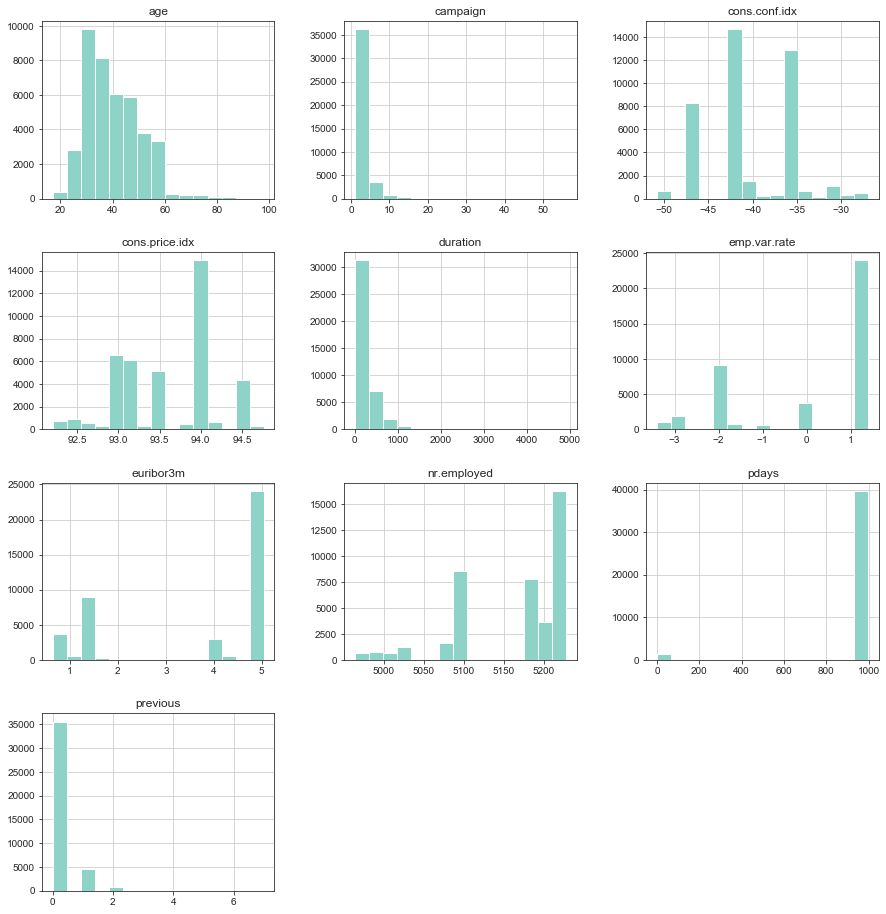

In [120]:
bank[bank.columns].hist(bins=15, figsize=(15, 16), layout=(4, 3));

## lets look at the correlation of between the variables

In [129]:
corr = bank.corr()

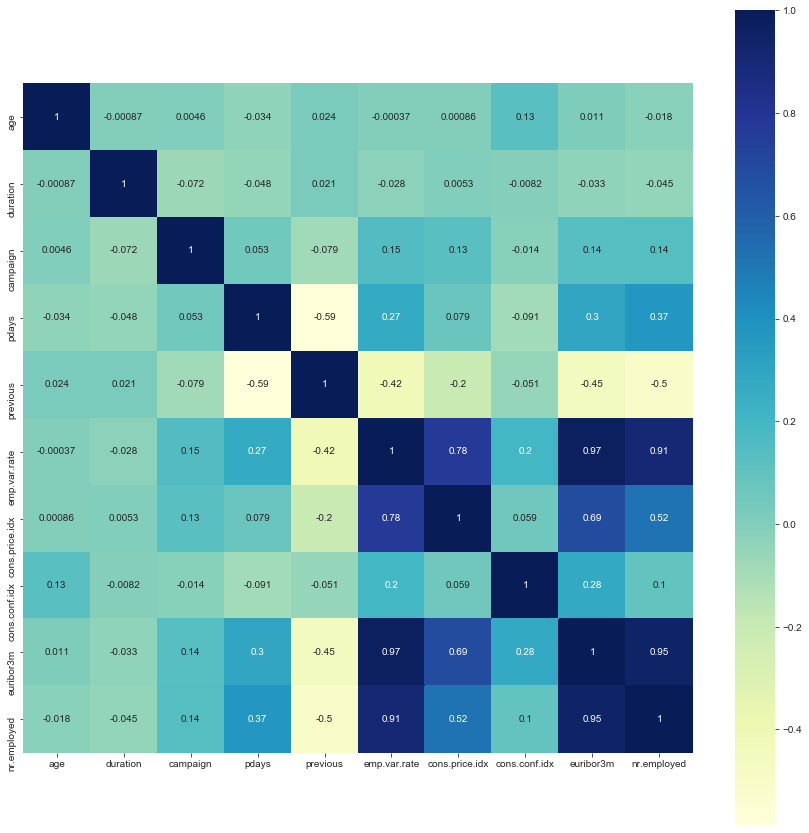

In [133]:
plt.figure(figsize=(15,15))
sns.heatmap(corr,square=True,annot=True, cmap = "YlGnBu")

### From the heatmap, we can see some negative and positive correaltion between variables. There are high positive correlation between:
- (euribor3m with emp.var.rate) of 0.97
- (nr.employed with emp.var.rate) of 0.91
- (euribor3m with nr.employed) of 0.95
- (euribor3m with cons.conf.idx) with 0.69


### lets convert the categorical variables into dummies which means converting them into numerical values. We will drop pdays since it is not balanced

# Cleaning and processing

In [134]:

# relabel target variable
bank["y"] = np.where(bank['y'] == "yes", 1, 0)

# define all the categorical variables that need to be 
catg = ['job', 'marital', 'education', 'housing', 'loan',"default", 'contact', 'month', 'day_of_week',"poutcome"]
bank= pd.get_dummies(bank, columns=catg).drop(["pdays"], axis=1)
bank.head()

age  duration  campaign  previous  emp.var.rate  cons.price.idx  \
0   56       261         1         0           1.1          93.994   
1   57       149         1         0           1.1          93.994   
2   37       226         1         0           1.1          93.994   
3   40       151         1         0           1.1          93.994   
4   56       307         1         0           1.1          93.994   

   cons.conf.idx  euribor3m  nr.employed  y  ...  month_oct  month_sep  \
0          -36.4      4.857       5191.0  0  ...          0          0   
1          -36.4      4.857       5191.0  0  ...          0          0   
2          -36.4      4.857       5191.0  0  ...          0          0   
3          -36.4      4.857       5191.0  0  ...          0          0   
4          -36.4      4.857       5191.0  0  ...          0          0   

   day_of_week_fri  day_of_week_mon  day_of_week_thu  day_of_week_tue  \
0                0                1                0                0   
1                0                1                0                0   
2                0                1                0                0   
3                0                1                0                0   
4                0                1                0                0   

   day_of_week_wed  poutcome_failure  poutcome_nonexistent  poutcome_success  
0                0                 0                     1                 0  
1                0                 0                     1                 0  
2                0                 0                     1                 0  
3                0                 0                     1                 0  
4                0                 0                     1                 0  

[5 rows x 63 columns]

In [135]:
bank.describe().T

count        mean         std   min    25%    50%  \
age                   41188.0   40.024060   10.421250  17.0   32.0   38.0   
duration              41188.0  258.285010  259.279249   0.0  102.0  180.0   
campaign              41188.0    2.567593    2.770014   1.0    1.0    2.0   
previous              41188.0    0.172963    0.494901   0.0    0.0    0.0   
emp.var.rate          41188.0    0.081886    1.570960  -3.4   -1.8    1.1   
...                       ...         ...         ...   ...    ...    ...   
day_of_week_tue       41188.0    0.196416    0.397292   0.0    0.0    0.0   
day_of_week_wed       41188.0    0.197485    0.398106   0.0    0.0    0.0   
poutcome_failure      41188.0    0.103234    0.304268   0.0    0.0    0.0   
poutcome_nonexistent  41188.0    0.863431    0.343396   0.0    1.0    1.0   
poutcome_success      41188.0    0.033335    0.179512   0.0    0.0    0.0   

                        75%     max  
age                    47.0    98.0  
duration              319.0  4918.0  
campaign                3.0    56.0  
previous                0.0     7.0  
emp.var.rate            1.4     1.4  
...                     ...     ...  
day_of_week_tue         0.0     1.0  
day_of_week_wed         0.0     1.0  
poutcome_failure        0.0     1.0  
poutcome_nonexistent    1.0     1.0  
poutcome_success        0.0     1.0  

[63 rows x 8 columns]

### plotting corralation with all variables against y. this way we can visualize what variable is correlated with y

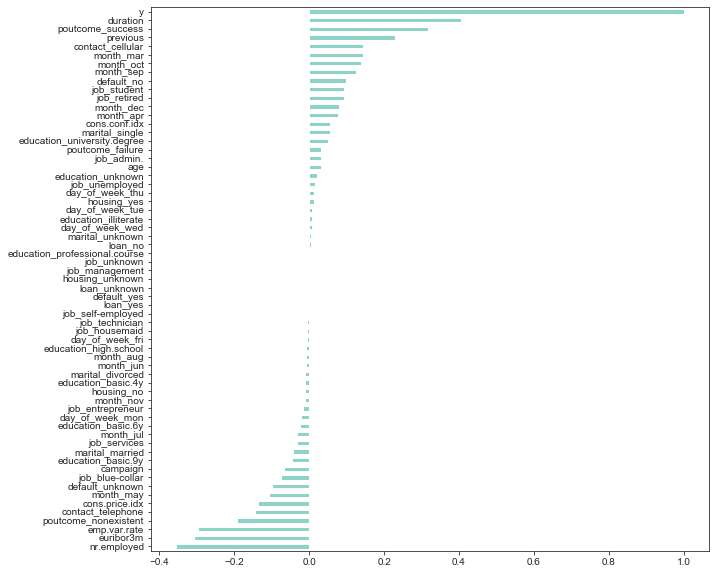

In [139]:
plt.figure(figsize=(10,10))
y = bank.corr()['y'].sort_values(ascending = True)
y.plot(kind="barh")

# Feature engineering

## Split Data into Training and Test

In [140]:
# split class and features

X=bank.drop('y',axis=1)
y=bank['y']

#split into train and test (70,30)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=5)

# Report spliting rows 
print("Original:", bank.shape,
      "\nX Train:",X_train.shape,
      "\nX Test:", X_test.shape,
      "\n",
      "\ny Train:", y_train.shape,
      "\ny Test:", y_test.shape)

Original: (41188, 63) 
X Train: (28831, 62) 
X Test: (12357, 62) 
 
y Train: (28831,) 
y Test: (12357,)


### the data has different range of numerics so we will normalize it by using Scaler() from Sklearn

In [141]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


for sanity check, using scaler make all columns' Average  = 0 and standard Deviation = 1

In [142]:
print("Mean:\n",
      np.round(np.mean(X_train,axis=0),1),
      "\nStandard Deviation:\n",
      np.round(np.std(X_train,axis=0),1))

Mean:
 [-0.  0. -0.  0. -0.  0.  0.  0. -0. -0.  0.  0.  0.  0. -0.  0.  0. -0.
  0.  0. -0. -0. -0. -0. -0.  0. -0.  0.  0. -0.  0.  0. -0. -0.  0.  0.
  0.  0. -0. -0.  0.  0.  0.  0. -0. -0. -0.  0. -0.  0.  0.  0. -0.  0.
  0. -0. -0. -0. -0. -0.  0. -0.] 
Standard Deviation:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


# Model Building

## 1.Logistic Regression

In [174]:
log=LogisticRegression(random_state=5)
log_mod = log.fit(X_train,y_train)

In [175]:
log_res = pd.DataFrame(log_mod.coef_,columns=list(X.columns))
log_res

age  duration  campaign  previous  emp.var.rate  cons.price.idx  \
0  0.01256  1.199305 -0.121976  0.012803     -2.779673        1.301692   

   cons.conf.idx  euribor3m  nr.employed  job_admin.  ...  month_oct  \
0       0.117083   0.580945     0.406186    0.014179  ...   0.035951   

   month_sep  day_of_week_fri  day_of_week_mon  day_of_week_thu  \
0   0.052063         -0.00853        -0.082817         0.005234   

   day_of_week_tue  day_of_week_wed  poutcome_failure  poutcome_nonexistent  \
0         0.034594          0.05278         -0.151054              0.011789   

   poutcome_success  
0          0.235264  

[1 rows x 62 columns]

In [176]:
print(classification_report(y_test,log.predict(X_test)))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     10908
           1       0.67      0.39      0.49      1449

    accuracy                           0.91     12357
   macro avg       0.80      0.68      0.72     12357
weighted avg       0.89      0.91      0.89     12357



In [177]:
print(average_precision_score(y_test,log.predict_proba(X_test)[:,1]))
print(roc_auc_score(y_test,log.predict_proba(X_test)[:,1]))

0.6045138589177279
0.933585508309285


In [178]:
pd.crosstab(y_test,log.predict(X_test))

col_0      0    1
y                
0      10631  277
1        883  566

In [214]:
log_y_pred = log.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, log_y_pred)

Text(0, 0.5, 'TPR (Recall)')

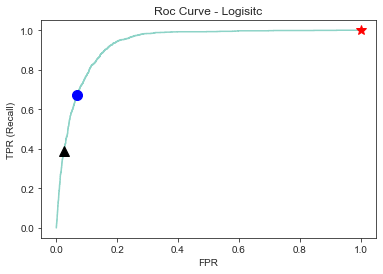

In [215]:
pt=np.argmin(np.abs(thresholds-0.5))
newpt=np.argmin(np.abs(thresholds-0.25))
thirdpt=np.argmin(np.abs(thresholds-0.0001))

plt.title("Roc Curve - Logisitc")
plt.plot(fpr,tpr,label='rf')
plt.plot(fpr[pt],tpr[pt],'^',c='k',markersize=10)
plt.plot(fpr[newpt],tpr[newpt],'o',c='b',markersize=10)
plt.plot(fpr[thirdpt],tpr[thirdpt],'*',c='r',markersize=10)
plt.xlabel('FPR')
plt.ylabel('TPR (Recall)')

### Analysis 

We notice from the LM the accuracy score is 91% accurate which is very high and it perform very well with our dataset. The classification report shows that precision of people who did not subscribed is 92% (0) and 67% precision of people who did subscribed (1)

### 2.KNN

In [206]:
knn = KNeighborsClassifier().fit(X_train,y_train)


In [207]:
print(classification_report(y_test,knn.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94     10908
           1       0.56      0.28      0.37      1449

    accuracy                           0.89     12357
   macro avg       0.73      0.62      0.65     12357
weighted avg       0.87      0.89      0.87     12357



In [208]:
pd.crosstab(y_test,knn.predict(X_test))

col_0      0    1
y                
0      10593  315
1       1050  399

In [209]:
knn_y_pred = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, knn_y_pred)

Text(0, 0.5, 'TPR (Recall)')

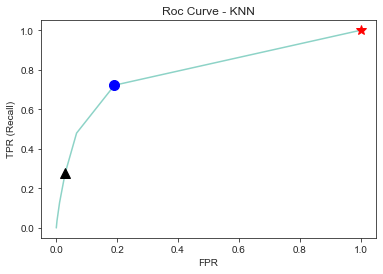

In [211]:
pt=np.argmin(np.abs(thresholds-0.5))
newpt=np.argmin(np.abs(thresholds-0.25))
thirdpt=np.argmin(np.abs(thresholds-0.0001))

plt.title("Roc Curve - KNN")
plt.plot(fpr,tpr,label='rf')
plt.plot(fpr[pt],tpr[pt],'^',c='k',markersize=10)
plt.plot(fpr[newpt],tpr[newpt],'o',c='b',markersize=10)
plt.plot(fpr[thirdpt],tpr[thirdpt],'*',c='r',markersize=10)
plt.xlabel('FPR')
plt.ylabel('TPR (Recall)')

## 3.Random Forest

In [183]:
num_trees=[50,300,1000]

In [184]:
cvres=[]
for num in num_trees:
    rf_cv_clf = RandomForestClassifier(n_estimators = num,random_state=5)
    cvclf = cross_validate(rf_cv_clf, X_train, y_train, cv=5, scoring='f1')
    cvres.append(cvclf['test_score'].mean())

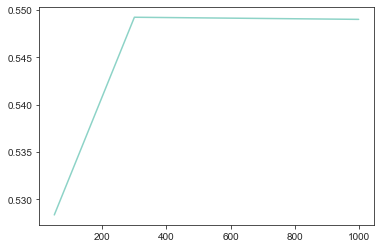

In [186]:
plt.plot(num_trees,cvres)

In [187]:
rf = RandomForestClassifier(n_estimators = 300,random_state=5).fit(X_train,y_train)

In [192]:
print(classification_report(y_test,rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10908
           1       0.66      0.42      0.52      1449

    accuracy                           0.91     12357
   macro avg       0.80      0.70      0.73     12357
weighted avg       0.90      0.91      0.90     12357



In [193]:
pd.crosstab(y_test,rf.predict(X_test))

col_0      0    1
y                
0      10599  309
1        836  613

Text(0, 0.5, 'TPR (Recall)')

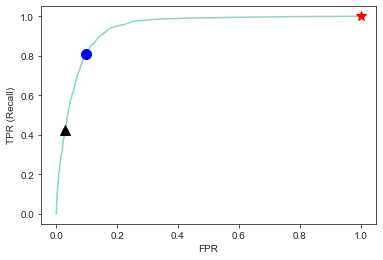

In [194]:
fpr, tpr, thresholds = roc_curve(y_test,rf.predict_proba(X_test)[:,1])

pt=np.argmin(np.abs(thresholds-0.5))
newpt=np.argmin(np.abs(thresholds-0.25))
thirdpt=np.argmin(np.abs(thresholds-0.0001))

plt.plot(fpr,tpr,label='rf')
plt.plot(fpr[pt],tpr[pt],'^',c='k',markersize=10)
plt.plot(fpr[newpt],tpr[newpt],'o',c='b',markersize=10)
plt.plot(fpr[thirdpt],tpr[thirdpt],'*',c='r',markersize=10)
plt.xlabel('FPR')
plt.ylabel('TPR (Recall)')

(-1, 62)

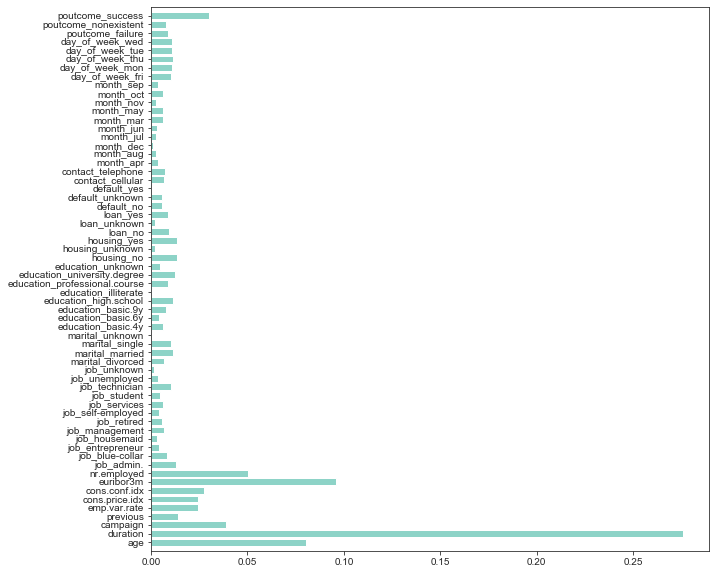

In [195]:
# Feature Importances of each variable
plt.figure(figsize=(10,10))
nfeat=X.shape[1]
plt.barh(np.arange(nfeat),rf.feature_importances_,align='center')
plt.yticks(np.arange(nfeat),list(X.columns))
plt.ylim(-1,nfeat)

We noticed that Duration has the highest feature importnace of Random Forest model and its about 26% and all other features fall into lower than 10% important 

### Final Analysis

In [222]:
print("--------Accuracy--------")
print("Logisitc:",accuracy_score(y_test,log.predict(X_test)),
     "\nRandom Forest:",accuracy_score(y_test,rf.predict(X_test)),
     "\nKNN:", accuracy_score(y_test,knn.predict(X_test)))

--------Accuracy--------
Logisitc: 0.9061260823824553 
Random Forest: 0.9073399692481994 
KNN: 0.8895362952172857


- A description of your analysis: what were you trying to do and why, and how did you achieve it.

After building different Models we want to come to better accuracy score and found that Random Forest is doing the slightly better with 90.7% accuracy than Logisitcs of 90.6% and has higher prediction for 0 and 1 of clients who subscribed for the term depoist. 
We see that RF has prediction of client subscribed a term deposit about 613 correct vs in Logisitcs with 566 clients who did subscribed. That means we have better prediction in Random Forest. KNN model did perform well although it has some fallbacks due to the amount of variables.

What I am trying to do is to use different models and observe each model accuracy to see which one perfomring despite the imbalance in the dataset. Also, by looking at the precision and recall of each model, we see that the recall on Random Forest is much higher thant Logisitic and KNN. which tell us how the false positive is minimized since we care about poeople who did subscribed. Moreover, Random Forest has 66% precision. and Logisict is slightly better wit 67% precision for clients who subscribed (1) which capture the false positive rate of (1). I am more concern about the prediction of poeple who subsrcped and try to find the best predcition for them and overall Random forest is the best model since it capture fair amount of (1) and (0). I want to achieve the optimal score that define the best model to measure the imbalance of the data. This is where the f1 score will determine the performance.

- A conclusion: What insight(s) into the original question did the model/analysis provide. Are there new questions or future work that the analysis suggests? Were the results surprising or expected?

The data is imbalanced and this the biggest issue we have since its predicting higher % of (0) and very low on (1) which is what we are focusing about and answer the question. The f1 score shows that Random Forest has the highest f1 score of 51.7% overall performance of the imbalance between precision and recall.

My suggestion is to try to deal with imbalance data and redo the data processing in order to make the it an equal weight of 0 and 1. This way we can have a better prediction accuracy for the model. However, there are 88% value of 0 in the dataset and only 12% of (1). if we resampled the data we are going to lose almost 60%. 

In [223]:
print("--------F1 Score--------")
print("Logisitc:",f1_score(y_test,log.predict(X_test)),
     "\nRandom Forest:",f1_score(y_test,rf.predict(X_test)),
     "\nKNN:", f1_score(y_test,knn.predict(X_test)))

--------F1 Score--------
Logisitc: 0.493891797556719 
Random Forest: 0.5170814002530577 
KNN: 0.36893203883495146


# Lazy Classifier

Warning* It will require a lot of library to load and do the modeling and get the result. Please find the PDF if things did not work

In [1]:
# pip install pyforest
# pip install lazypredict
# conda install -c conda-forge lightgbm
# conda install py-xgboost

import pyforest
import warnings
import lightgbm as lgb
from lightgbm import LGBMClassifier as lgb
# For regression tasks
from lightgbm import LGBMRegressor as lbg
from lightgbm import LGBMRegressor
warnings.filterwarnings("ignore")
from sklearn import metrics
from sklearn.metrics import accuracy_score
import lazypredict
from lazypredict.Supervised import LazyClassifier

This is to explore different models at once and see how each of the model perform on the dataset. Something to keep in mind that Lazy Classifier might not be a reliable as sklearn models with tuning paramters. And Lazy Classifier is giving a hit and idae where to go in depth of each model to truly find the explination of the prediction

In [21]:
clf = LazyClassifier(verbose=0,ignore_warnings=True)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
models

 90%|████████▉ | 26/29 [03:45<00:31, 10.44s/it]

[23:05:59] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


100%|██████████| 29/29 [03:48<00:00,  7.89s/it]


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
NearestCentroid                    0.79               0.76     0.76      0.82   
BernoulliNB                        0.82               0.74     0.74      0.84   
LGBMClassifier                     0.91               0.73     0.73      0.91   
XGBClassifier                      0.91               0.73     0.73      0.90   
LinearDiscriminantAnalysis         0.91               0.73     0.73      0.90   
DecisionTreeClassifier             0.88               0.71     0.71      0.88   
BaggingClassifier                  0.90               0.71     0.71      0.90   
RandomForestClassifier             0.91               0.70     0.70      0.90   
Perceptron                         0.87               0.70     0.70      0.87   
LogisticRegression                 0.91               0.68     0.68      0.89   
CalibratedClassifierCV             0.90               0.68     0.68      0.89   
AdaBoostClassifier                 0.90               0.67     0.67      0.89   
SVC                                0.90               0.67     0.67      0.89   
LinearSVC                          0.91               0.66     0.66      0.89   
ExtraTreeClassifier                0.86               0.65     0.65      0.86   
ExtraTreesClassifier               0.90               0.65     0.65      0.88   
RidgeClassifier                    0.90               0.64     0.64      0.88   
RidgeClassifierCV                  0.90               0.64     0.64      0.88   
PassiveAggressiveClassifier        0.88               0.64     0.64      0.87   
SGDClassifier                      0.90               0.63     0.63      0.88   
LabelPropagation                   0.87               0.63     0.63      0.86   
LabelSpreading                     0.87               0.63     0.63      0.86   
KNeighborsClassifier               0.89               0.62     0.62      0.87   
QuadraticDiscriminantAnalysis      0.28               0.51     0.51      0.32   
DummyClassifier                    0.80               0.51     0.51      0.80   
GaussianNB                         0.88               0.50     0.50      0.83   

                               Time Taken  
Model                                      
NearestCentroid                      0.14  
BernoulliNB                          0.19  
LGBMClassifier                       0.52  
XGBClassifier                        3.18  
LinearDiscriminantAnalysis           0.47  
DecisionTreeClassifier               0.37  
BaggingClassifier                    1.81  
RandomForestClassifier               3.38  
Perceptron                           0.20  
LogisticRegression                   0.35  
CalibratedClassifierCV              33.27  
AdaBoostClassifier                   1.59  
SVC                                 31.98  
LinearSVC                            8.52  
ExtraTreeClassifier                  0.19  
ExtraTreesClassifier                 4.08  
RidgeClassifier                      0.20  
RidgeClassifierCV                    0.36  
PassiveAggressiveClassifier          0.24  
SGDClassifier                        0.66  
LabelPropagation                    30.41  
LabelSpreading                      57.79  
KNeighborsClassifier                48.07  
QuadraticDiscriminantAnalysis        0.28  
DummyClassifier                      0.14  
GaussianNB                           0.16